# Auswertung der Gruppengrößen
Diese Datei enthält die Auswertung der Gruppengrößen aus den Tabellen der Prozesstypen.
1. Laden der Daten
2. Datenvorverarbeitung
3. Kuchendiagramm der Gruppengrößen

## Bibliotheken

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## Stildefinitionen für Plots

In [2]:
#Definierter Plotstyle für die Bachelorarbeit
#Muss zu den anderen Bibliotheken hinzugefügt werden
#Datei in Dateien eingefügt
plt.style.use('ba')

## Helferfunktionen

In [3]:
def load_data(path):
    return pd.DataFrame(pd.read_csv(path+file_suffix, sep=";"))

def get_groups(groups_ptypes, number):
    all_groups = 0
    for groups_ptype in groups_ptypes:
        if str(number) in groups_ptype.head():
            all_groups += sum(groups_ptype[str(number)])
    return all_groups*number

## Daten Laden

In [4]:
path_alight = "Tabels\Groups\GroupsAlight"
path_boarding = "Tabels\Groups\GroupsBoarding"
path_spacemaker = "Tabels\Groups\GroupsSpacemaker"

file_suffix = ".csv"

In [5]:
data_groups_alight = load_data(path_alight)
data_groups_boarding = load_data(path_boarding)
data_groups_spacemaker = load_data(path_spacemaker)
data_groups = [data_groups_alight, data_groups_boarding, data_groups_spacemaker]

## Datenvorverarbeitung
Summieren der Gruppenanzahlen für die Prozesstypen.

In [6]:
dic_groups = {}
for i in range(1, 6):
    dic_groups[i] = get_groups(data_groups, i)
dic_groups["> 5"] = get_groups(data_groups, 6)+get_groups(data_groups, 7)+get_groups(data_groups, 11)

## Kuchendiagramm der Gruppengrößen

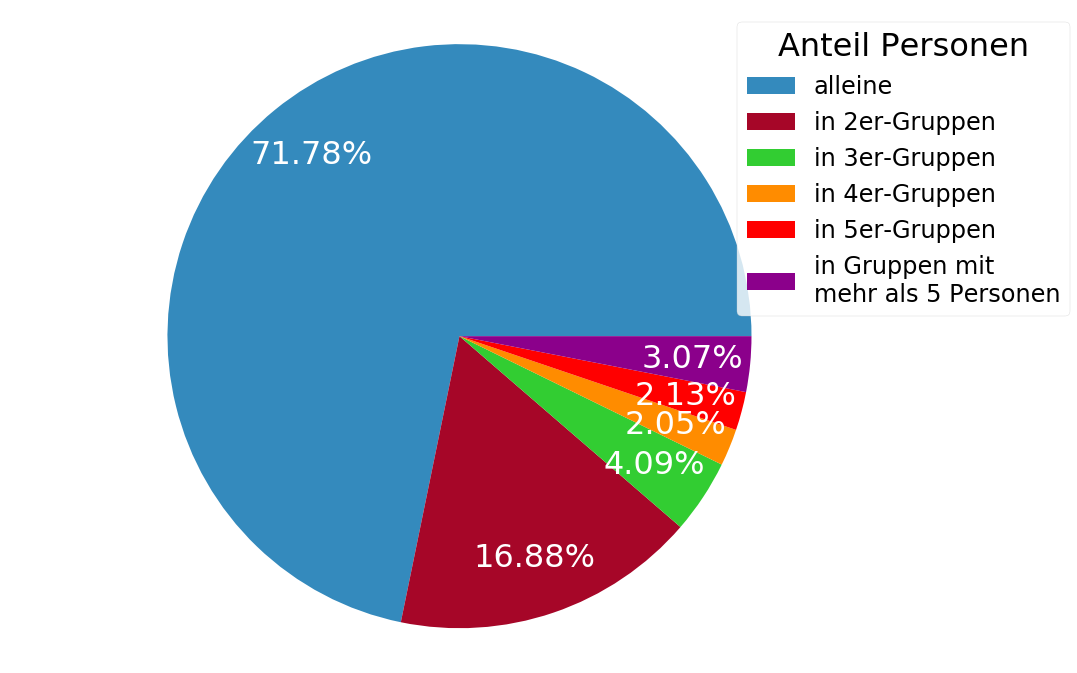

In [7]:
plt.figure(figsize=(16,12))

title = "Anteil Personen"
labels = 'alleine', 'in 2er-Gruppen', 'in 3er-Gruppen', 'in 4er-Gruppen', 'in 5er-Gruppen', 'in Gruppen mit \nmehr als 5 Personen'

counts = dic_groups.values()

plt.pie(counts, labels=labels, autopct="%1.2f%%", pctdistance=0.8, startangle=0, textprops=dict(color="w"))
plt.legend(title=title, bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.axis('equal')

plt.savefig('..\\Text\\pictures\\data_evaluation\\groups\\groups.png', bbox_inches='tight')